In [1]:
# !pip install fasteda
# from fasteda import fast_eda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

In [2]:
train = pd.read_csv("./train.csv").drop('id',axis=1)
test = pd.read_csv("./test.csv").drop('id',axis=1)
original = pd.read_csv("./ConcreteStrengthData.csv")

In [3]:
original = original.rename(columns={'CementComponent ':'CementComponent'})

In [4]:
print(original.columns)
print(train.columns)

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')
Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')


In [5]:
print(len(train))
print(len(test))

5407
3605


In [6]:
train = pd.concat([train,original],axis=0)
train = train.drop_duplicates().reset_index(drop=True)
train = train[train['AgeInDays'] != 49]


In [7]:
# Calculate TotalComponentWeight
train['TotalComponentWeight'] = train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'] + train['WaterComponent'] + train['SuperplasticizerComponent'] + train['CoarseAggregateComponent'] + train['FineAggregateComponent']

# Calculate Water-Cement-Ratio (WCR)
train['WCR'] = train['WaterComponent'] / train['CementComponent']

# Calculate Aggregate-Ratio (AR)
train['AR'] = (train['CoarseAggregateComponent'] + train['FineAggregateComponent']) / train['CementComponent']

# Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
train['WCPR'] = train['WaterComponent'] / (train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'])

# Calculate Cement-Age
train['Cement-Age'] = train['CementComponent'] * train['AgeInDays']

In [8]:
# Calculate TotalComponentWeight
test['TotalComponentWeight'] = test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'] + test['WaterComponent'] + test['SuperplasticizerComponent'] + test['CoarseAggregateComponent'] + test['FineAggregateComponent']

# Calculate Water-Cement-Ratio (WCR)
test['WCR'] = test['WaterComponent'] / test['CementComponent']

# Calculate Aggregate-Ratio (AR)
test['AR'] = (test['CoarseAggregateComponent'] + test['FineAggregateComponent']) / test['CementComponent']

# Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
test['WCPR'] = test['WaterComponent'] / (test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'])

# Calculate Cement-Age
test['Cement-Age'] = test['CementComponent'] * test['AgeInDays']

In [9]:
# train['Unknown'] = (train.CoarseAggregateComponent) - (train.CementComponent + train.BlastFurnaceSlag + train.FlyAshComponent)
# test['Unknown'] = (test.CoarseAggregateComponent) - (test.CementComponent + test.BlastFurnaceSlag + test.FlyAshComponent)

In [10]:
print(len(train))
print(len(test))

6411
3605


In [11]:
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,TotalComponentWeight,WCR,AR,WCPR,Cement-Age
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38,2449.0,0.354286,3.310476,0.354286,1575.0
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52,2264.0,1.335664,11.258741,0.419780,4004.0
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96,2479.7,0.642561,6.471626,0.438282,8092.0
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05,2210.0,0.750000,5.269737,0.600000,110960.0
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19,2301.6,1.222930,10.933758,0.488550,14130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,2309.6,0.649783,5.927641,0.372074,7739.2
6408,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,2275.5,0.608318,5.063004,0.447693,9021.6
6409,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,2267.7,1.297643,11.261953,0.486003,4158.0
6410,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,2311.2,1.103708,11.178504,0.507808,4454.8


In [12]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])


[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 11, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [13]:
test.loc[197,'AgeInDays'] = 14

In [14]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])


[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [15]:
print(len(train))
print(len(test))

6411
3605


In [16]:
from sklearn.preprocessing import MinMaxScaler
encoder = MinMaxScaler()
encoder.fit([i for i in np.array(sorted(train.AgeInDays.unique())).reshape(-1,1)])
train.AgeInDays = encoder.transform(np.array(train.AgeInDays).reshape(-1,1))
test.AgeInDays = encoder.transform(np.array(test.AgeInDays).reshape(-1,1))

In [17]:
from sklearn.preprocessing import StandardScaler

standard_target = ['CementComponent','BlastFurnaceSlag','FlyAshComponent','WaterComponent',
                  'SuperplasticizerComponent','CoarseAggregateComponent','FineAggregateComponent',
                  'TotalComponentWeight','WCR','AR','WCPR','Cement-Age']

for i in standard_target:
    tar = np.array([i for i in train[f'{i}'].append(test[f'{i}']).reset_index().drop('index',axis=1)[f'{i}']]).reshape(-1,1)
    encoder = StandardScaler()
    encoder.fit(tar)
    train[f'{i}'] = encoder.transform(np.array(train[f'{i}']).reshape(-1,1))
    test[f'{i}'] = encoder.transform(np.array(test[f'{i}']).reshape(-1,1))

train = train.reset_index(drop=True)

C:\Users\user\AppData\Local\Temp\ipykernel_24108\1056109424.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tar = np.array([i for i in train[f'{i}'].append(test[f'{i}']).reset_index().drop('index',axis=1)[f'{i}']]).reshape(-1,1)
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1056109424.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tar = np.array([i for i in train[f'{i}'].append(test[f'{i}']).reset_index().drop('index',axis=1)[f'{i}']]).reshape(-1,1)
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1056109424.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tar = np.array([i for i in train[f'{i}'].append(test[f'{i}']).reset_index().drop('index',axis=1)[f'{i}']]).reshape(-1,1)
C:\Users\user\AppData\Local\Tem

In [18]:
drop_list = []

for tar in standard_target:
    for i in range(len(train)):
        if abs(train.loc[i,tar]) > 2.58:
            drop_list.append(i)

In [19]:
train = train.drop(sorted(list(set(drop_list)))).reset_index(drop=True)

In [20]:
train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,TotalComponentWeight,WCR,AR,WCPR,Cement-Age
count,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000
mean,-0.013935,-0.030729,0.043728,-0.015527,-0.011413,0.040487,0.025819,0.109689,34.994980,0.039840,-0.035680,-0.019690,-0.034056,-0.151747
std,0.948796,0.951843,1.002193,0.939449,0.887237,0.979676,0.940063,0.126167,16.281502,0.846331,0.893899,0.916766,0.834531,0.573870
min,-1.570101,-0.710737,-0.613381,-2.505363,-0.748892,-2.442370,-2.277808,0.000000,2.330000,-2.579177,-1.521810,-1.408671,-1.890795,-0.629293
25%,-0.793489,-0.710737,-0.613381,-0.617420,-0.748892,-0.629430,-0.361353,0.016484,23.350000,-0.557306,-0.657761,-0.748295,-0.674507,-0.531817
50%,-0.015928,-0.710737,-0.613381,0.079832,-0.748892,-0.049289,0.112979,0.074176,33.690000,0.093327,-0.286185,-0.306729,-0.069261,-0.328216
75%,0.619223,0.748258,1.083817,0.401640,0.755173,0.743225,0.616638,0.151099,44.640000,0.638385,0.423202,0.611125,0.480420,-0.065460
max,2.303464,2.578634,2.578841,2.332491,2.535848,2.012283,2.491015,1.000000,82.600000,2.565731,2.555369,2.483534,2.557085,2.556897


In [21]:
# for i in test.columns:
#     plt.title(f'{i}')
#     plt.subplot(1,2,1)
#     sns.boxplot(train[f'{i}'],)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    
#     plt.subplot(1,2,2)
#     sns.boxplot(test[f'{i}'],color='red')#.plot.hist(bins=100,grid='on',figsize=(5,5))
#     plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

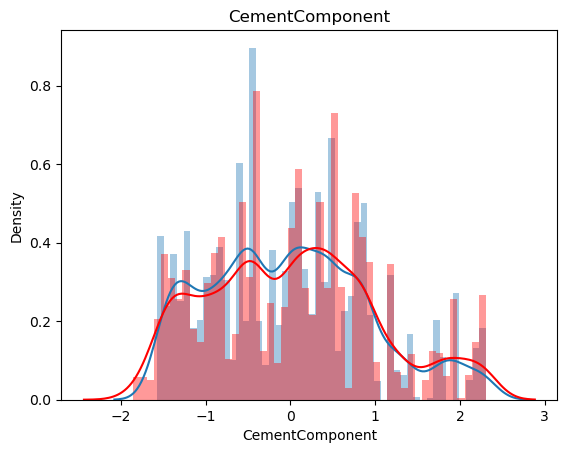

C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

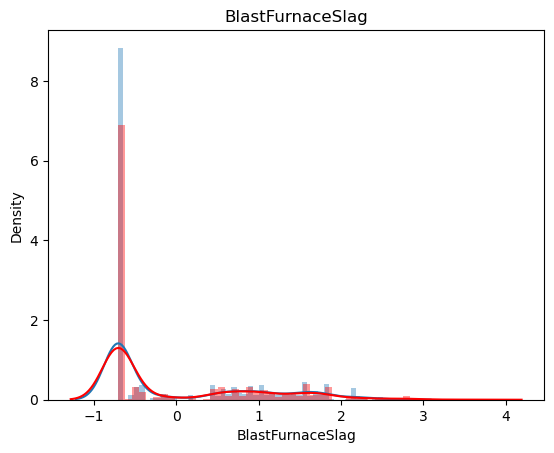

C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

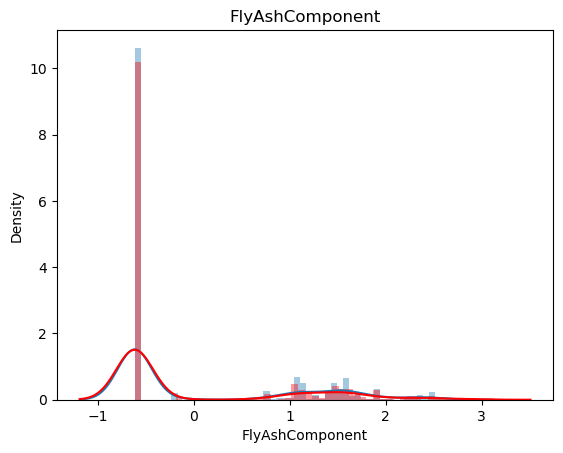

C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

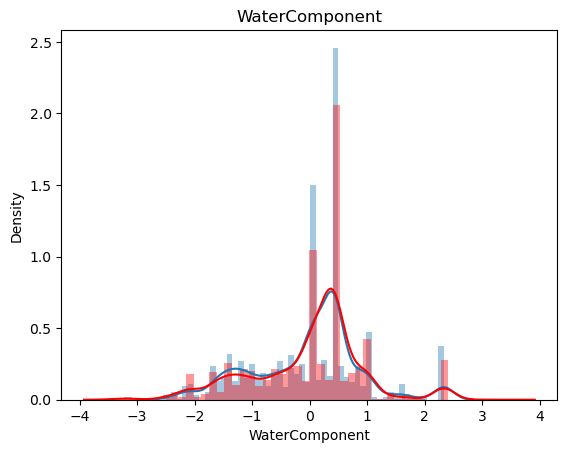

C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

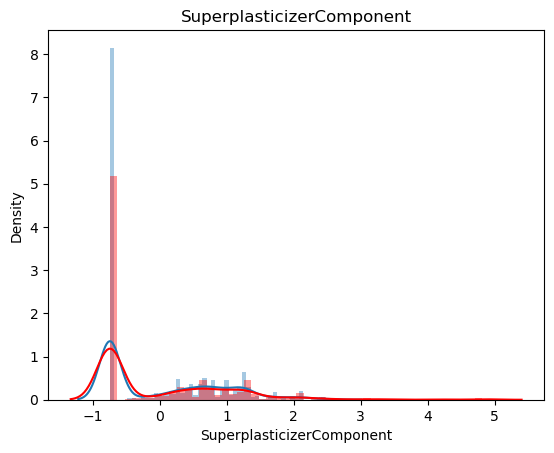

C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

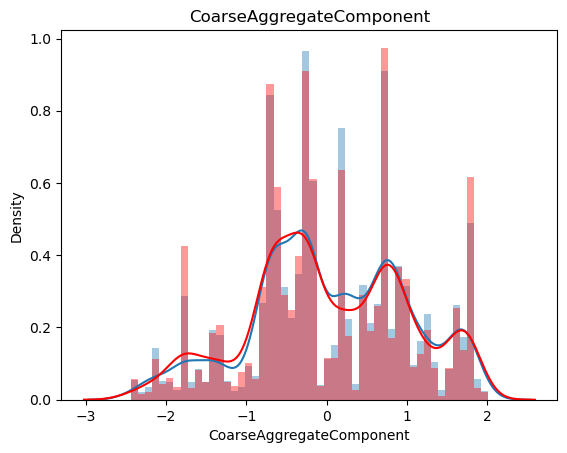

C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

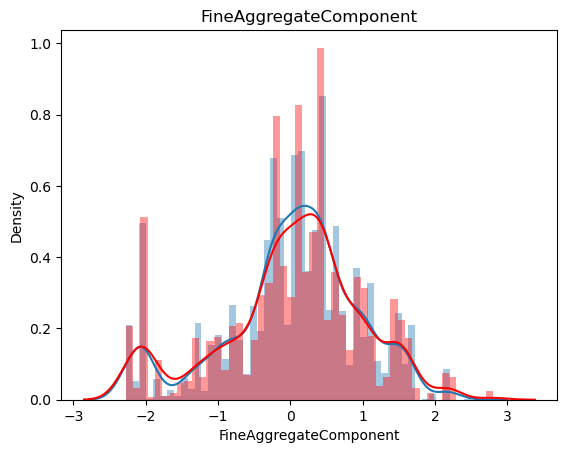

C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

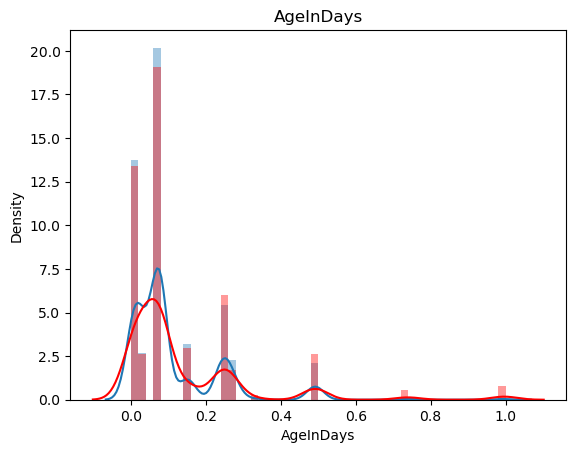

C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

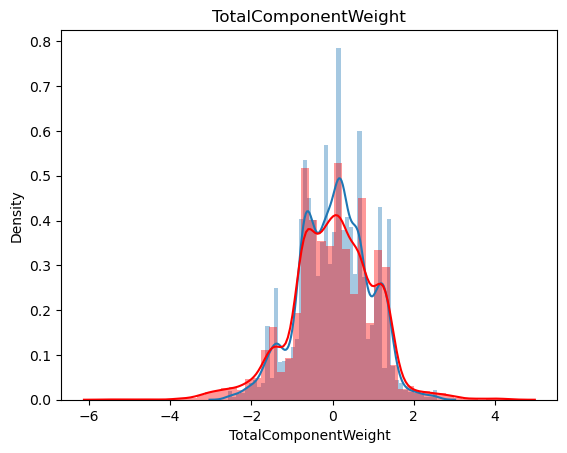

C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

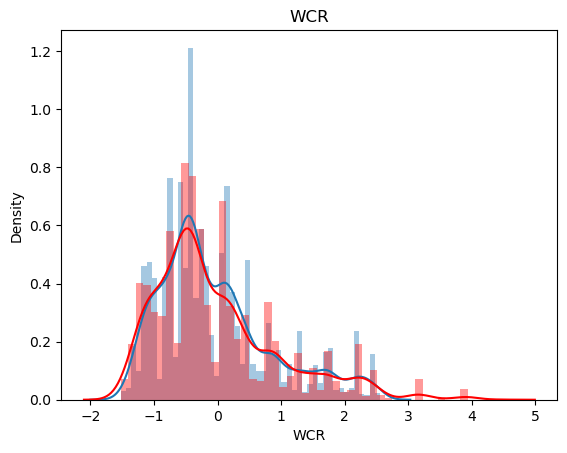

C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

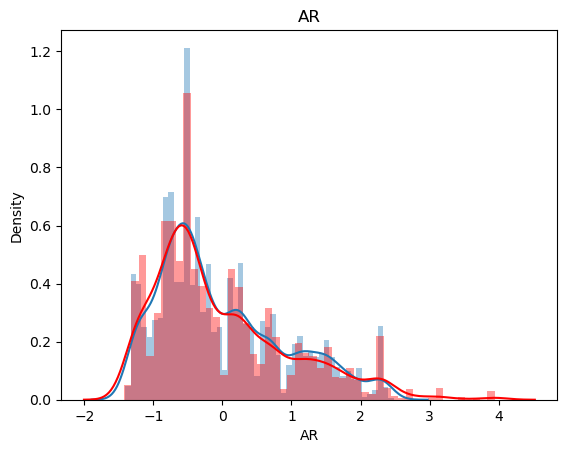

C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

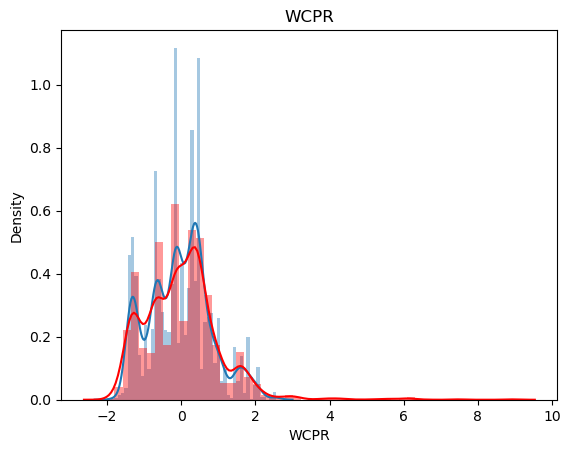

C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_24108\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

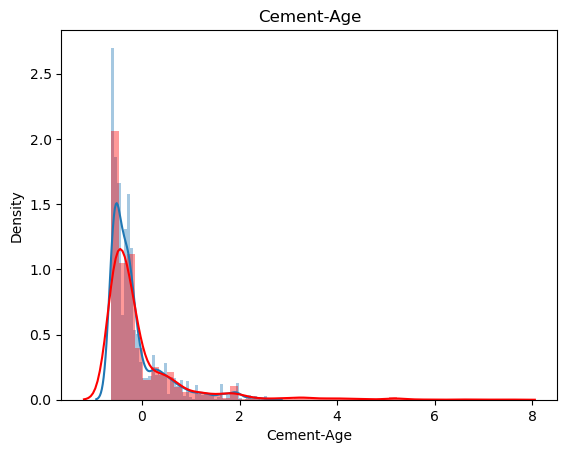

In [22]:
# 콘크리트의 강도는 물과 시멘트의 비율이 낮아지면 증가합니다.
# CementComponent:- Amount of cement is mixed
# BlastFurnaceSlag:- Amount of Blast Furnace Slag is mixed
# FlyAshComponent:- Amount of FlyAsh is mixed
# WaterComponent:- Amount of water is mixed
# SuperplasticizerComponent:- Amount of Super plasticizer is mixed
# CoarseAggregateComponent:- Amount of Coarse Aggregate is mixed
# FineAggregateComponent:- Amount of Coarse Aggregate is mixed
# AgeInDays:- How many days it was left dry
# Strength:- What was the final strength of concrete- (Target)
for i in test.columns:
    plt.title(f'{i}')
    sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    sns.distplot(test[f'{i}'],color='red',bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    plt.show()


In [23]:
train = train.reset_index(drop=True)

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
# import optuna
# from optuna.samplers import TPESampler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

In [25]:
target = 'Strength'
features = [c for c in train.columns if c not in [target]]

In [26]:
kf = KFold(n_splits = 10, random_state = 41, shuffle = True)
models = []
val_scores = []
preds = []

params = {
'n_estimators':15000,
'max_depth':6,
'early_stopping_rounds':200,
'learning_rate':0.01,
'one_hot_max_size':3,
'bootstrap_type':"MVS",
'l2_leaf_reg':2,
'random_state':41
         }

for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
    X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
    y_train, y_val = train[target][train_index], train[target][val_index]
    
#     if include_orig:
#         X_train = X_train.append(original[features], ignore_index = True)
#         y_train = y_train.append(original[target], ignore_index = True)
    
    model = CatBoostRegressor(**params)
    
    model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = 2000)
    
    models.append(model)
    # pred = model.predict_proba(X_val)[:,1]
    # score = accuracy_score(y_val, model.predict(X_val))
    score = mean_squared_error(y_val, model.predict(X_val))

    val_scores.append(score)
    
    print(f'mse on fold {i}: {score:.4f}')
    
print(f'mean mse across all folds: {np.mean(val_scores):.4f}')

0it [00:00, ?it/s]C:\Users\user\anaconda3\envs\pycaret\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 16.1439794	test: 16.8182850	best: 16.8182850 (0)	total: 139ms	remaining: 34m 45s


1it [00:01,  1.35s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.57032468
bestIteration = 619

Shrink model to first 620 iterations.
mse on fold 0: 133.8724
0:	learn: 16.1740469	test: 16.5376325	best: 16.5376325 (0)	total: 26.5ms	remaining: 6m 36s


C:\Users\user\anaconda3\envs\pycaret\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
2it [00:02,  1.32s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 12.06744783
bestIteration = 712

Shrink model to first 713 iterations.
mse on fold 1: 145.6233
0:	learn: 16.1907854	test: 16.3576128	best: 16.3576128 (0)	total: 4.84ms	remaining: 1m 12s


C:\Users\user\anaconda3\envs\pycaret\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
3it [00:04,  1.76s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 12.30083648
bestIteration = 1375

Shrink model to first 1376 iterations.
mse on fold 2: 151.3106
0:	learn: 16.2269307	test: 16.0629512	best: 16.0629512 (0)	total: 37.5ms	remaining: 9m 22s


C:\Users\user\anaconda3\envs\pycaret\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
4it [00:06,  1.88s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.86173936
bestIteration = 1237

Shrink model to first 1238 iterations.
mse on fold 3: 140.7009
0:	learn: 16.2019212	test: 16.2713192	best: 16.2713192 (0)	total: 51.7ms	remaining: 12m 55s


C:\Users\user\anaconda3\envs\pycaret\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
5it [00:08,  1.85s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 10.85272847
bestIteration = 1110

Shrink model to first 1111 iterations.
mse on fold 4: 117.7817
0:	learn: 16.2588085	test: 15.7636897	best: 15.7636897 (0)	total: 36.3ms	remaining: 9m 3s


C:\Users\user\anaconda3\envs\pycaret\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
6it [00:09,  1.56s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.19868851
bestIteration = 525

Shrink model to first 526 iterations.
mse on fold 5: 125.4106
0:	learn: 16.2314662	test: 16.0080348	best: 16.0080348 (0)	total: 34.4ms	remaining: 8m 36s


C:\Users\user\anaconda3\envs\pycaret\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
7it [00:11,  1.64s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.40078047
bestIteration = 1081

Shrink model to first 1082 iterations.
mse on fold 6: 129.9778
0:	learn: 16.2155915	test: 16.1692393	best: 16.1692393 (0)	total: 22.4ms	remaining: 5m 35s


C:\Users\user\anaconda3\envs\pycaret\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
8it [00:13,  1.62s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.86614815
bestIteration = 967

Shrink model to first 968 iterations.
mse on fold 7: 140.8055
0:	learn: 16.2253377	test: 16.0870207	best: 16.0870207 (0)	total: 29.9ms	remaining: 7m 27s


C:\Users\user\anaconda3\envs\pycaret\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
9it [00:15,  1.81s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.12835273
bestIteration = 1456

Shrink model to first 1457 iterations.
mse on fold 8: 123.8402
0:	learn: 16.2291825	test: 16.0392403	best: 16.0392403 (0)	total: 20.8ms	remaining: 5m 11s


C:\Users\user\anaconda3\envs\pycaret\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
10it [00:17,  1.71s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.4597604
bestIteration = 977

Shrink model to first 978 iterations.
mse on fold 9: 131.3261
mean mse across all folds: 134.0649


In [27]:
np.array([i**(1/2) for i in val_scores]).mean()

11.570680714545624

In [28]:
models

In [29]:
kf = KFold(n_splits = 10, random_state = 41, shuffle = True)
models = []
val_scores = []
preds = []

params = {
'n_estimators':200,
'max_depth':6,
#'early_stopping_rounds':200,
'learning_rate':0.01,
#'one_hot_max_size':3,
#'bootstrap_type':"MVS",
#'l2_leaf_reg':2,
'random_state':41
         }

for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
    X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
    y_train, y_val = train[target][train_index], train[target][val_index]
    
#     if include_orig:
#         X_train = X_train.append(original[features], ignore_index = True)
#         y_train = y_train.append(original[target], ignore_index = True)
    
    model = GradientBoostingRegressor(**params)
    
    model.fit(X_train, y_train)
    
    models.append(model)
    # pred = model.predict_proba(X_val)[:,1]
    # score = accuracy_score(y_val, model.predict(X_val))
    score = mean_squared_error(y_val, model.predict(X_val))

    val_scores.append(score)
    
    print(f'mse on fold {i}: {score:.4f}')
    
print(f'mean mse across all folds: {np.mean(val_scores):.4f}')

1it [00:02,  2.11s/it]

mse on fold 0: 141.2142


2it [00:04,  2.09s/it]

mse on fold 1: 153.0974


3it [00:06,  2.09s/it]

mse on fold 2: 157.4640


4it [00:08,  2.12s/it]

mse on fold 3: 148.7194


5it [00:10,  2.09s/it]

mse on fold 4: 124.4708


6it [00:13,  2.43s/it]

mse on fold 5: 131.3456


7it [00:16,  2.43s/it]

mse on fold 6: 135.4391


8it [00:19,  2.73s/it]

mse on fold 7: 144.3157


9it [00:22,  2.71s/it]

mse on fold 8: 131.1570


10it [00:24,  2.47s/it]

mse on fold 9: 131.9968
mean mse across all folds: 139.9220


In [30]:
np.array([i**(1/2) for i in val_scores]).mean()

11.820973332769565

In [31]:
# kf = KFold(n_splits = 10, random_state = 5, shuffle = True)
# models = []
# val_scores = []
# preds = []

# include_orig = True

# xgb_params = {'n_estimators'     : 3000,
#               'min_child_weight' : 96,
#               'max_depth'        : 7,
#               'learning_rate'    : 0.05,
#               'subsample'        : 0.95,
#               'colsample_bytree' : 0.95,
#               'reg_lambda'       : 1.50,
#               'reg_alpha'        : 1.50,
#               'gamma'            : 1.50,
#               'max_bin'          : 512,
#               'random_state'     : 41,
#               # 'objective'        : 'binary:logistic',
#               'tree_method'      : 'hist',
#               'eval_metric'      : 'auc'
#              }
# # xgb_params = {'max_depth': 3,
# #  'learning_rate': 0.09457198987172621,
# #  'min_child_weight': 9,
# #  'gamma': 0.3126168664550514,
# #  'subsample': 0.5585879695479943,
# #  'colsample_bytree': 0.46793424854801835,
# #  'reg_alpha': 0.21235299325212031,
# #  'reg_lambda': 0.4236760707956293,
# #  'n_estimators': 606}

# for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
#     X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
#     y_train, y_val = train[target][train_index], train[target][val_index]
    
# #     if include_orig:
# #         X_train = X_train.append(original[features], ignore_index = True)
# #         y_train = y_train.append(original[target], ignore_index = True)
    
#     model = XGBRegressor(**xgb_params)
    
#     model.fit(X_train, y_train)
    
#     models.append(model)
#     pred = model.predict(X_val)
#     # score = roc_auc_score(y_val, pred)
#     score = mean_squared_error(y_val, model.predict(X_val))

#     val_scores.append(score)
    
#     print(f'score on fold {i}: {score:.4f}')
    
# print(f'mean score across all folds: {np.mean(val_scores):.4f}')

In [32]:
np.array([i**(1/2) for i in val_scores]).mean()

11.820973332769565

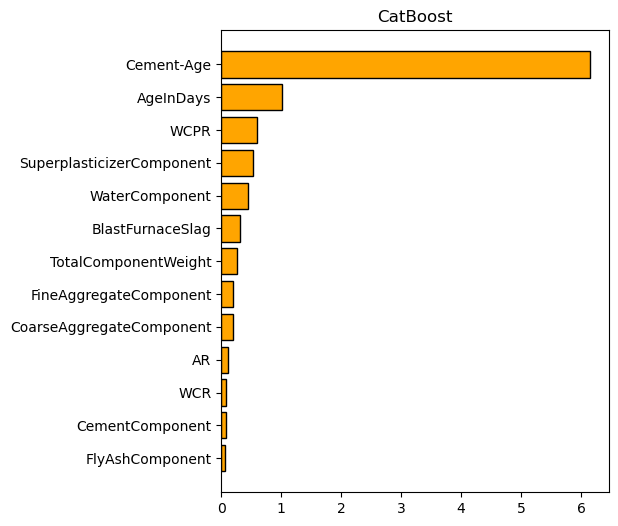

In [33]:
plt.figure(figsize = (5, 6))
cat_imp = np.zeros(len(models[0].feature_importances_))
for model in models[:10]:
    cat_imp += model.feature_importances_
    
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "orange", edgecolor = "#000000")

plt.title("CatBoost")
plt.show()

In [34]:
models

[GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostin

In [35]:
cat_preds = []
for model in models[:10]:
    preds = model.predict(test[features])
    cat_preds.append(preds)

<AxesSubplot: ylabel='Frequency'>

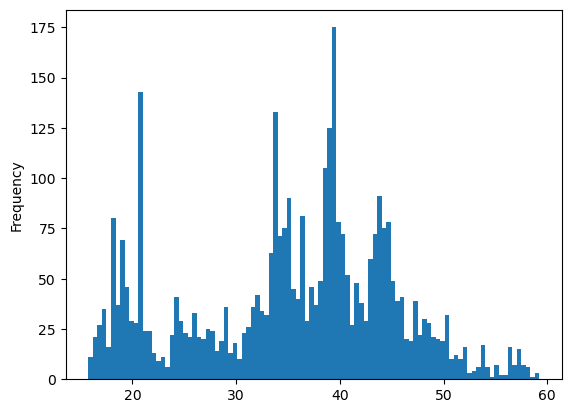

In [36]:
sub = pd.read_csv('./sample_submission.csv')
sub['Strength'] = np.array(cat_preds).mean(axis=0) #.mean(axis=0)
sub = sub.set_index('id')
sub.to_csv('./submission.csv')
sub['Strength'].plot.hist(bins=100)

In [37]:
def cat_objective(trial):
    
    params_optuna = {
        'iterations':trial.suggest_int("iterations", 4000, 25000),
        'od_wait':trial.suggest_int('od_wait', 500, 2300),
        'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
        'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
        'subsample': trial.suggest_uniform('subsample',0,1),
        'random_strength': trial.suggest_uniform('random_strength',10,50),
        'depth': trial.suggest_int('depth',1, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
        'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
        'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.4, 1.0),
    }
    n=10
    cv = KFold(n,shuffle=True, random_state=42)
    all_scores = []
    for i,(train_idx,val_idx) in enumerate(cv.split(train[features],train[target])):
        X_train, y_train = train.loc[train_idx, features],train.loc[train_idx, target]
        X_val, y_val = train.loc[val_idx, features],train.loc[val_idx, target]

        model = CatBoostRegressor(**params_optuna)
        model.fit(X_train,
                  y_train,
                  eval_set = [(X_val,y_val)],
                  early_stopping_rounds=50,
                  verbose=500)

        y_pred = model.predict(X_val)
        score = mean_squared_error(y_val,y_pred)
        all_scores.append(score)

    return np.mean(all_scores)

In [38]:
# study = optuna.create_study(direction='maximize', sampler = TPESampler())
# study.optimize(func=cat_objective, n_trials=50)
# study.best_params

In [39]:
# kf = KFold(n_splits = 10, random_state = 41, shuffle = True)
# models = []
# val_scores = []
# preds = []

# params = study.best_params

# for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
#     X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
#     y_train, y_val = train[target][train_index], train[target][val_index]
    
# #     if include_orig:
# #         X_train = X_train.append(original[features], ignore_index = True)
# #         y_train = y_train.append(original[target], ignore_index = True)
    
#     model = CatBoostRegressor(**params)
    
#     model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = 2000)
    
#     models.append(model)
#     # pred = model.predict_proba(X_val)[:,1]
#     # score = accuracy_score(y_val, model.predict(X_val))
#     score = mean_squared_error(y_val, model.predict(X_val))

#     val_scores.append(score)
    
#     print(f'mse on fold {i}: {score:.4f}')
    
# print(f'mean mse across all folds: {np.mean(val_scores):.4f}')

In [40]:
# np.array([i**(1/2) for i in val_scores]).mean()

> grad : underfit

> cat : overfit